**Loading the IMDB dataset**

In [5]:
# importing libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers

Divide the dataset into training and test sets.


Load the data, keeping only 10,000 of the most frequently occuring words


In [6]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Printing the first review from the training data

In [7]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
# Check the first label

train_labels[0]

1

In [9]:
# Only 10000 frequent words are considered and therefore the word index should not exceed the frequent word count.

# Find the maximum of all the maximum indexes
max([max(sequence) for sequence in train_data])

9999

Decoding movie reviews back to text

In [10]:
# Let's decode the review

# step 1: Load the mappings of the dictionary from the word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to integer mapping 
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# step 3: Decode the review, mapping integer to words
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
len(reverse_word_index)

88584

Preparing the data

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))                   
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1                                 
    return results

# Vectorizing the train data
x_train = vectorize_sequences(train_data)
# Vectorizing the test data
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
x_train.shape

(25000, 10000)

In [15]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Building the model**

Our input dataset consisted of vectors which must be converted to encoder labels (0s and 1s). This is one of the simplest setups, and a basic stack of fully connected Dense layers with relu activation operates well.

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 76ms/step - loss: 0.5511 - accuracy: 0.7787 - val_loss: 0.4334 - val_accuracy: 0.8399
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3492 - accuracy: 0.8873 - val_loss: 0.3286 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2603 - accuracy: 0.9140 - val_loss: 0.3054 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2078 - accuracy: 0.9328 - val_loss: 0.2780 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1776 - accuracy: 0.9419 - val_loss: 0.2754 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 50ms/step - loss: 0.1485 - accuracy: 0.9525 - val_loss: 0.2809 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1285 - accuracy: 0.9587 - val_loss: 0.3026 - val_accuracy: 0.8820
Epoch 8/20
30

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

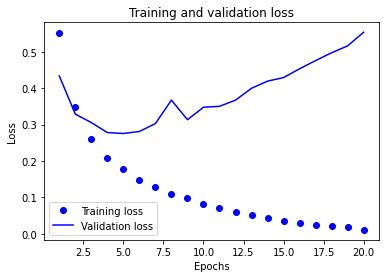

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]             # Plotting the losses
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the  training and validation accuracy**

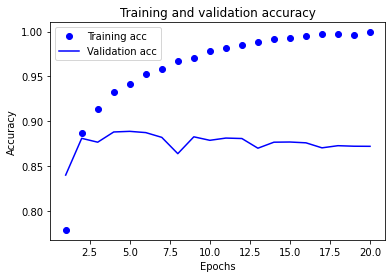

In [22]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]                     # Plotting the accuracy
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining our model**

four epochs are used in retraining the model

In [23]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3, batch_size=512)     
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 3s 33ms/step - loss: 0.4595 - accuracy: 0.8132
Epoch 2/3
49/49 [==============================] - 2s 44ms/step - loss: 0.2726 - accuracy: 0.9022
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.2831 - accuracy: 0.8880


In [24]:
results

[0.2830926477909088, 0.8880400061607361]

 **1.  You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.**   

In [25]:
# model is built using three hidden layers with relu activation function
model_13 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# # model is built using one hidden layer with relu activation function
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [26]:
#using RMSProp and binary cross entropy for both the three and one hidden layers.
model_13.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [27]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history_13 = model_13.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_11 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 72ms/step - loss: 0.5573 - accuracy: 0.7495 - val_loss: 0.4029 - val_accuracy: 0.8589
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3283 - accuracy: 0.8888 - val_loss: 0.3118 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2316 - accuracy: 0.9203 - val_loss: 0.2924 - val_accuracy: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1878 - accuracy: 0.9351 - val_loss: 0.2983 - val_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1541 - accuracy: 0.9487 - val_loss: 0.2847 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1288 - accuracy: 0.9577 - val_loss: 0.3002 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1031 - accuracy: 0.9683 - val_loss: 0.3277 - val_accuracy: 0.8775
Epoch 8/20
30

Plotting training and validation loss

In [28]:
historyp_13 = history_13.history
historyp_13.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
historyp_11 = history_11.history
historyp_11.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting training and testing loss

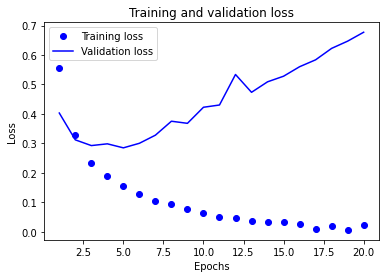

In [30]:

historyp_13 = history_13.history
loss_values3 = historyp_13["loss"]
val_loss_values3 = historyp_13["val_loss"]            #plotting the losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here, the minimum validation loss is observed at 5th epoch

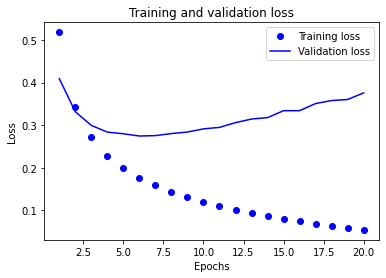

In [31]:
historyp_11 = history_11.history
loss_values1 = historyp_11["loss"]
val_loss_values1 = historyp_11["val_loss"]           #plotting the losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here, the minimum validation loss is observed at 5th epoch

Plotting training and testing accuracy

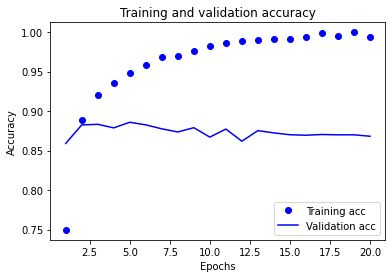

In [32]:
plt.clf()
acc3 = historyp_13["accuracy"]
val_acc3 = historyp_13["val_accuracy"]           #plotting the accuracy 
plt.plot(epochs, acc3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the maximum validation accuracy is observed at 5th epoch

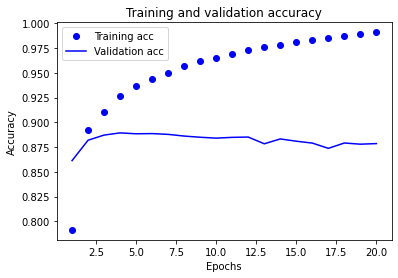

In [33]:
plt.clf()
acc1 = historyp_11["accuracy"]
val_acc1 = historyp_11["val_accuracy"]          #plotting the accuracy
plt.plot(epochs, acc1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the maximum vallidation accuracy is observed at 5th epoch.

 **2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.**   





In [34]:
#model is built using 2 hidden layers with 32 and 64 nodes.
model_2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [35]:
#using RMSProp and binary cross entropy 
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [36]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 88ms/step - loss: 0.4971 - accuracy: 0.7749 - val_loss: 0.4101 - val_accuracy: 0.8221
Epoch 2/20
30/30 [==============================] - 2s 75ms/step - loss: 0.2882 - accuracy: 0.8978 - val_loss: 0.2944 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 2s 50ms/step - loss: 0.2117 - accuracy: 0.9250 - val_loss: 0.4231 - val_accuracy: 0.8280
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1838 - accuracy: 0.9338 - val_loss: 0.2785 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1463 - accuracy: 0.9498 - val_loss: 0.3164 - val_accuracy: 0.8752
Epoch 6/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1283 - accuracy: 0.9547 - val_loss: 0.3115 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1063 - accuracy: 0.9639 - val_loss: 0.3217 - val_accuracy: 0.8837
Epoch 8/20
30

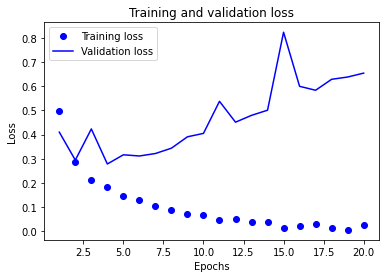

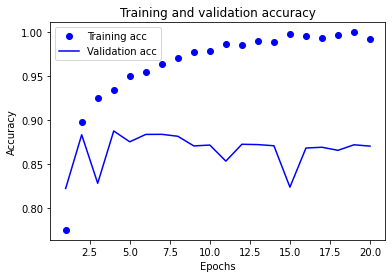

In [37]:
historyp2 = history2.history
loss_values = historyp2["loss"]
val_loss_values = historyp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp2["accuracy"]
val_acc = historyp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The minimum validation loss is observed at 3rd epoch and maximum validation accuracy is observed at 3rd and 4th epochs.

**3. Try using the mse loss function instead of binary_crossentropy.** 

In [38]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [39]:
#using RMSProp and mse loss function 
model_3.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [40]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.1882 - accuracy: 0.7567 - val_loss: 0.1336 - val_accuracy: 0.8558
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1095 - accuracy: 0.8839 - val_loss: 0.1020 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0817 - accuracy: 0.9073 - val_loss: 0.0956 - val_accuracy: 0.8748
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0665 - accuracy: 0.9246 - val_loss: 0.0859 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0572 - accuracy: 0.9369 - val_loss: 0.0879 - val_accuracy: 0.8808
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0497 - accuracy: 0.9447 - val_loss: 0.0849 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0434 - accuracy: 0.9527 - val_loss: 0.0833 - val_accuracy: 0.8859
Epoch 8/20
30

**Plotting training and testing loss**

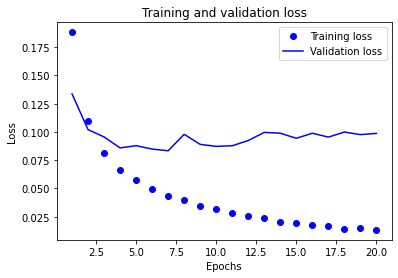

In [41]:
historyp3 = history3.history
loss_values = historyp3["loss"]
val_loss_values = historyp3["val_loss"]             #plotting the losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here, the minimum validation loss is observed in 3rd epoch.

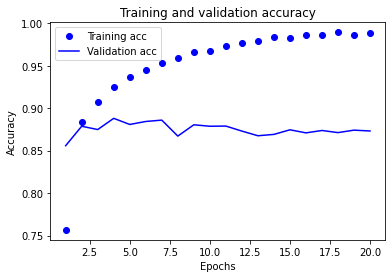

In [42]:
plt.clf()
acc = historyp3["accuracy"]
val_acc = historyp3["val_accuracy"]            #plotting the accuracy plots
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the maximum accuracy is observed in 2nd and 3rd epochs.

**4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.**

In [43]:
#model is built using tanh activation function.
model_4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [44]:
#using RMSProp and binary cross entropy 
model_4.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [45]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history4 = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.1661 - accuracy: 0.7816 - val_loss: 0.1144 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0917 - accuracy: 0.8951 - val_loss: 0.0906 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0681 - accuracy: 0.9171 - val_loss: 0.0891 - val_accuracy: 0.8777
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0532 - accuracy: 0.9370 - val_loss: 0.0871 - val_accuracy: 0.8796
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.0442 - accuracy: 0.9483 - val_loss: 0.0963 - val_accuracy: 0.8692
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0382 - accuracy: 0.9549 - val_loss: 0.0891 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0315 - accuracy: 0.9647 - val_loss: 0.0911 - val_accuracy: 0.8787
Epoch 8/20
30

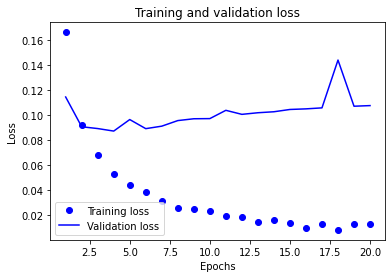

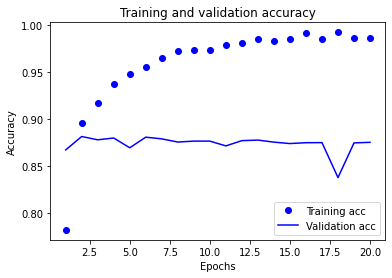

In [46]:
historyp4 = history4.history
loss_values = historyp4["loss"]
val_loss_values = historyp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp4["accuracy"]
val_acc = historyp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Here, the minimum validation loss is observed in 3rd epoch and maximum validation accuracy is observed in 3rd epoch.

In [47]:
results

[0.2830926477909088, 0.8880400061607361]

**5. Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.**

In [48]:
model_5 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [49]:
#using RMSProp and binary cross entropy 
model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [50]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history5 = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 93ms/step - loss: 0.5249 - accuracy: 0.7601 - val_loss: 0.3637 - val_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3158 - accuracy: 0.8809 - val_loss: 0.2908 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2423 - accuracy: 0.9091 - val_loss: 0.2753 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1929 - accuracy: 0.9302 - val_loss: 0.2826 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1565 - accuracy: 0.9453 - val_loss: 0.2841 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1303 - accuracy: 0.9543 - val_loss: 0.2975 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0976 - accuracy: 0.9697 - val_loss: 0.3239 - val_accuracy: 0.8863
Epoch 8/20
30

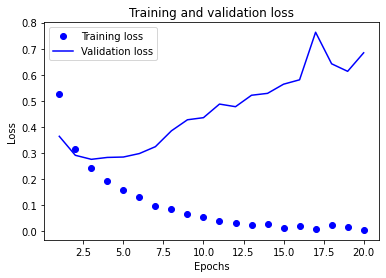

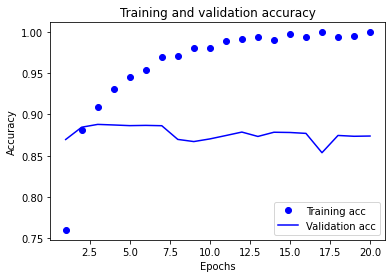

In [51]:
historyp5 = history5.history
loss_values = historyp5["loss"]
val_loss_values = historyp5["val_loss"]        #plotting the losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp5["accuracy"]    
val_acc = historyp5["val_accuracy"]            #plotting the accuracy plots
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the minimum validation loss is observed in 3rd epoch and maximum validation accuracy is observed in 3rd epoch.

In [52]:
results

[0.2830926477909088, 0.8880400061607361]